   PassengerId  Survived  Pclass      Lname  \
0            1         0       3     Braund   
1            2         1       1    Cumings   
2            3         1       3  Heikkinen   
3            4         1       1   Futrelle   
4            5         0       3      Allen   

                                          Name     Sex   Age  SibSp  Parch  \
0                              Mr. Owen Harris    male  22.0      1      0   
1   Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1      0   
2                                  Miss. Laina  female  26.0      0      0   
3           Mrs. Jacques Heath (Lily May Peel)  female  35.0      1      0   
4                            Mr. William Henry    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            37345

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12660\2358225025.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12660\2358225025.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

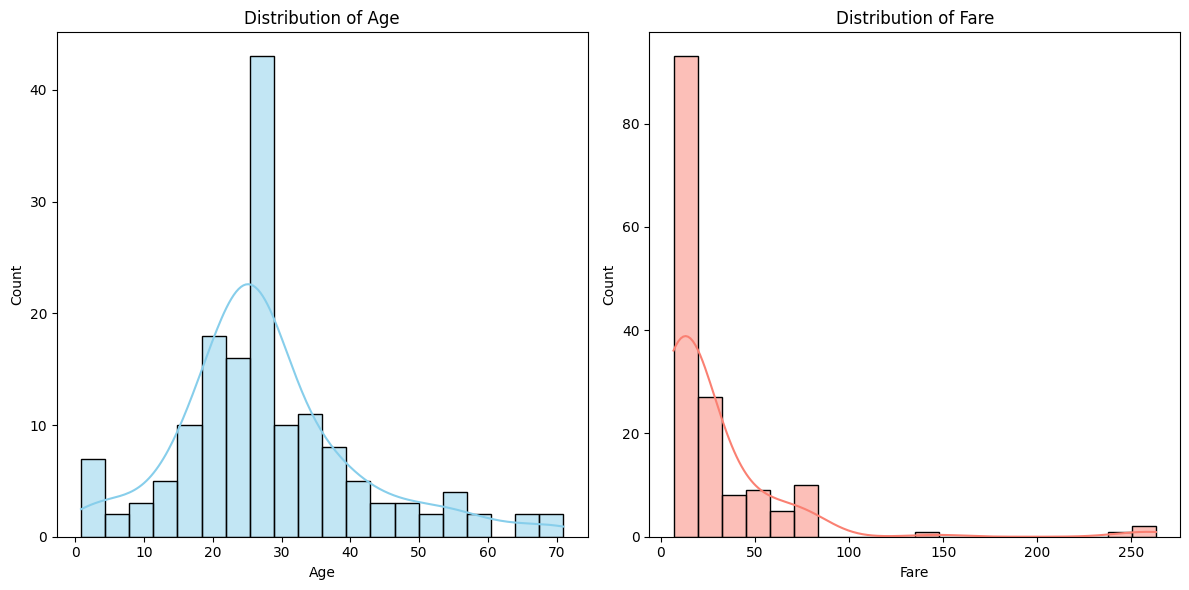

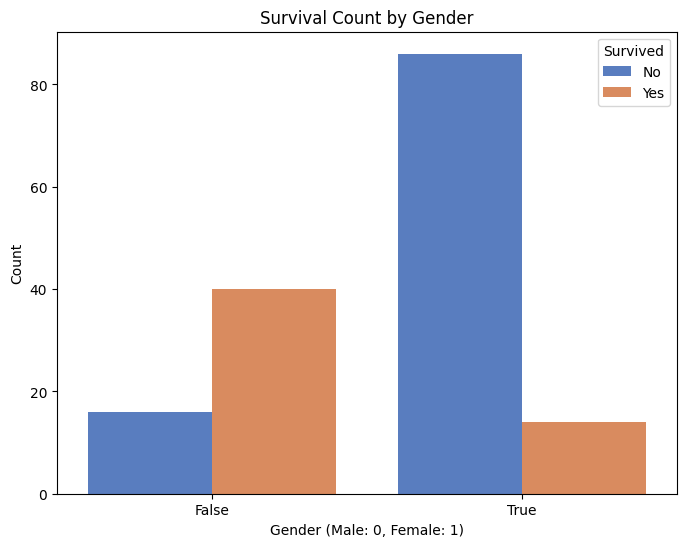

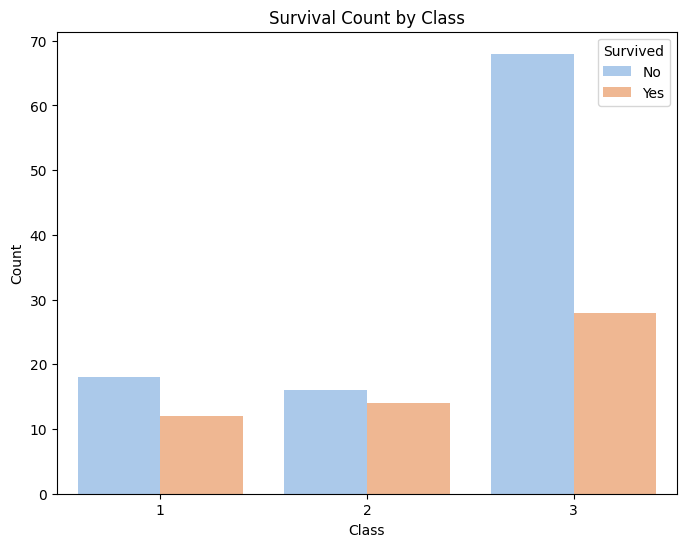

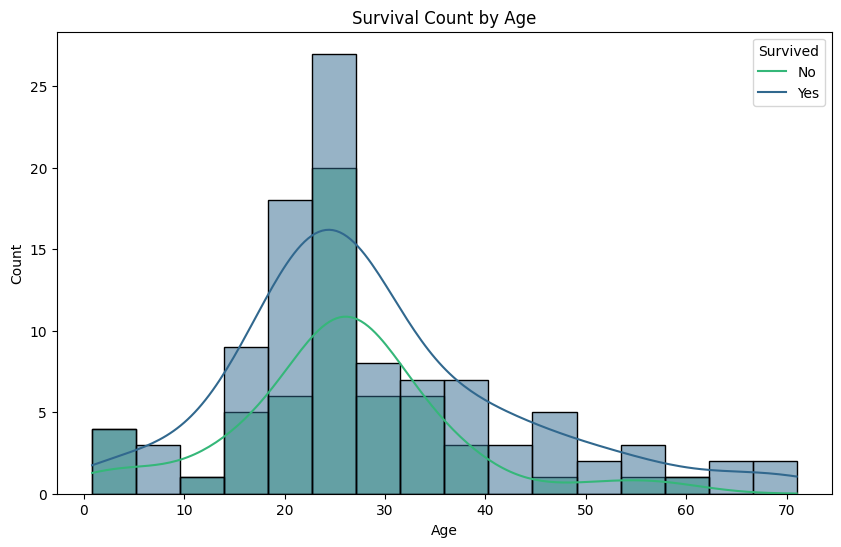

Survived        int64
Pclass          int64
Lname          object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male         bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


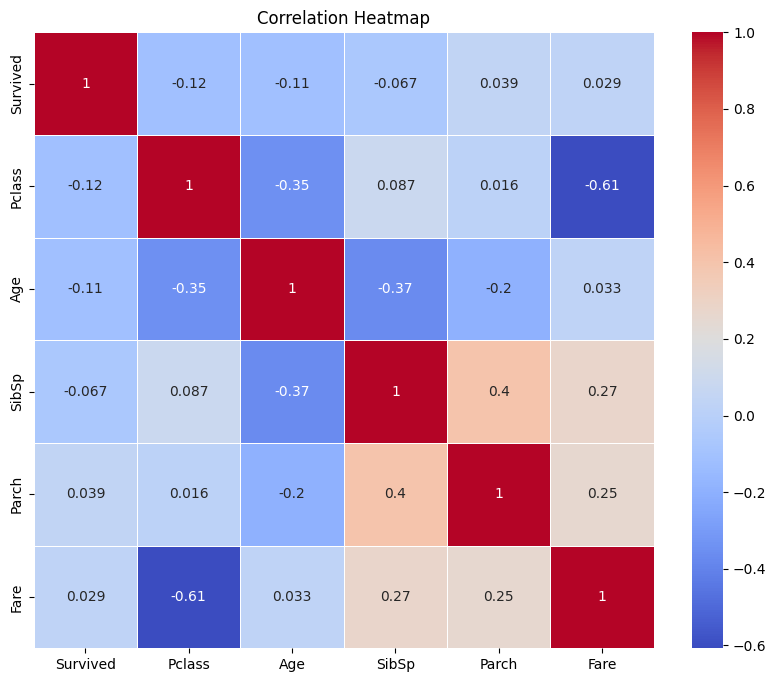

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_df = pd.read_csv("titanic.csv")

# Display the first few rows of the dataset
print(titanic_df.head())

# Data Cleaning

# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Fill missing values for 'Age' with the median age
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables to numeric using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Exploratory Data Analysis (EDA)

# Summary Statistics
summary_stats = titanic_df.describe()
print("Summary Statistics:")
print(summary_stats)

# Visualizing Age and Fare distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(titanic_df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Survival rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_male', hue='Survived', data=titanic_df, palette='muted')
plt.title('Survival Count by Gender')
plt.xlabel('Gender (Male: 0, Female: 1)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival rate by class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette='pastel')
plt.title('Survival Count by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=titanic_df, kde=True, palette='viridis')
plt.title('Survival Count by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Check the data types of columns
print(titanic_df.dtypes)

# Correlation heatmap excluding non-numeric columns
numeric_columns = titanic_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = titanic_df[numeric_columns].corr()

# Visualize the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


